In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as rng
from scipy.io import arff

In [2]:
spf_data = arff.loadarff('steel-plates-fault.arff')
spf_df = pd.DataFrame(spf_data[0])
spf_da = spf_df.to_numpy()
spf_x = spf_da[:, :-1]
spf_y = spf_da[:, -1]

io_data = arff.loadarff('ionosphere.arff')
io_df = pd.DataFrame(io_data[0])
io_da = io_df.to_numpy()
io_x = io_da[:, :-1]
io_y = io_da[:, -1]

ba_data = arff.loadarff('banknote-authentication.arff')
ba_df = pd.DataFrame(ba_data[0])
ba_da = ba_df.to_numpy()
ba_x = ba_da[:, :-1]
ba_y = ba_da[:, -1]


In [4]:
#KNN Classifier
from matplotlib import pyplot as plt
from numpy import average
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

neighbor_value = [1,2,3,4,5]
knn_steelplate_accuracy_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( spf_x, spf_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_steelplate_accuracy = accuracy_score(y_test, pre_y)
        knn_steelplate_accuracy_list.append(knn_steelplate_accuracy)
knn_steelplate_accuracy_final = pd.DataFrame( { '1': knn_steelplate_accuracy_list[0:50], 
                                            '2': knn_steelplate_accuracy_list[50:100], 
                                            '3': knn_steelplate_accuracy_list[100:150], 
                                            '4': knn_steelplate_accuracy_list[150:200], 
                                            '5': knn_steelplate_accuracy_list[200:250] } )

knn_ionosphere_accuracy_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( io_x, io_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_ionosphere_accuracy = accuracy_score(y_test, pre_y)
        knn_ionosphere_accuracy_list.append(knn_ionosphere_accuracy)
knn_ionosphere_accuracy_final = pd.DataFrame( { '1': knn_ionosphere_accuracy_list[0:50], 
                                            '2': knn_ionosphere_accuracy_list[50:100], 
                                            '3': knn_ionosphere_accuracy_list[100:150], 
                                            '4': knn_ionosphere_accuracy_list[150:200], 
                                            '5': knn_ionosphere_accuracy_list[200:250] } )

knn_banknote_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( ba_x, ba_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_banknote_accuracy = accuracy_score(y_test, pre_y)
        knn_banknote_list.append(knn_banknote_accuracy)
knn_banknote_accuracy_final = pd.DataFrame( { '1': knn_banknote_list[0:50], 
                                            '2': knn_banknote_list[50:100], 
                                            '3': knn_banknote_list[100:150], 
                                            '4': knn_banknote_list[150:200], 
                                            '5': knn_banknote_list[200:250] } )    

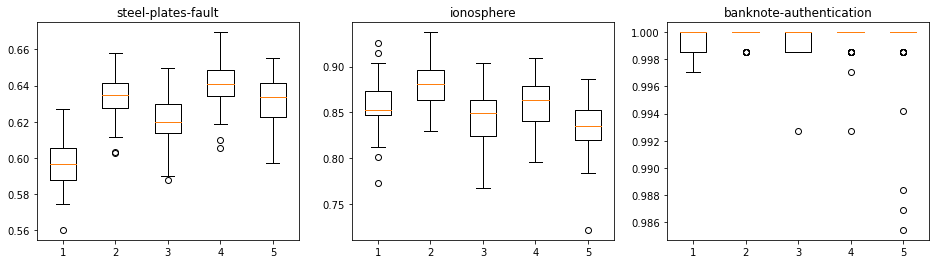

In [70]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(knn_steelplate_accuracy_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(knn_ionosphere_accuracy_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(knn_banknote_accuracy_final)
plt.show()

In [71]:
#GaussianNB Classifier
from sklearn.naive_bayes import GaussianNB

gnb_steelplate_accuracy_list = []
gnb_neighbor_value = [1e-9,1e-5,1e-1]
for n in gnb_neighbor_value:
    for i in range(50):
        gnb_X_train, gnb_X_test, gnb_y_train, gnb_y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        gnb_y_train=gnb_y_train.astype('int') # convert to string
        gnb_y_test = gnb_y_test.astype('int') # convert to string
        gnb = GaussianNB(priors=None, var_smoothing=n)
        gnb.fit(gnb_X_train, gnb_y_train)
        gnb_y_pred = gnb.predict(gnb_X_test) 
        gnb_steelplate_accuracy = accuracy_score(gnb_y_test, gnb_y_pred)
        gnb_steelplate_accuracy_list.append(gnb_steelplate_accuracy)
gnb_steelplate_accuracy_final = pd.DataFrame( { '1': gnb_steelplate_accuracy_list[0:50], 
                                            '2': gnb_steelplate_accuracy_list[50:100], 
                                            '3': gnb_steelplate_accuracy_list[100:150], } )

gnb_ionosphere_accuracy_list = []
for n in gnb_neighbor_value:
    for i in range(50):
        gnb_X_train, gnb_X_test, gnb_y_train, gnb_y_test = train_test_split(io_x, io_y, test_size=0.5, random_state=i)
        gnb_y_train=gnb_y_train.astype('str') # convert to string
        gnb_y_test = gnb_y_test.astype('str') # convert to string
        gnb = GaussianNB(priors=None, var_smoothing=n)
        gnb.fit(gnb_X_train, gnb_y_train)
        gnb_y_pred = gnb.predict(gnb_X_test) 
        gnb_ionosphere_accuracy = accuracy_score(gnb_y_test, gnb_y_pred)
        gnb_ionosphere_accuracy_list.append(gnb_ionosphere_accuracy)
gnb_ionosphere_accuracy_final = pd.DataFrame( { '1': gnb_ionosphere_accuracy_list[0:50], 
                                            '2': gnb_ionosphere_accuracy_list[50:100], 
                                            '3': gnb_ionosphere_accuracy_list[100:150], } )

gnb_banknote_accuracy_list = []
for n in gnb_neighbor_value:
    for i in range(50):
        gnb_X_train, gnb_X_test, gnb_y_train, gnb_y_test = train_test_split(ba_x, ba_y, test_size=0.5, random_state=i)
        gnb_y_train=gnb_y_train.astype('str') # convert to string
        gnb_y_test = gnb_y_test.astype('str') # convert to string
        gnb = GaussianNB(priors=None, var_smoothing=n)
        gnb.fit(gnb_X_train, gnb_y_train)
        gnb_y_pred = gnb.predict(gnb_X_test) 
        gnb_banknote_accuracy = accuracy_score(gnb_y_test, gnb_y_pred)
        gnb_banknote_accuracy_list.append(gnb_banknote_accuracy)
gnb_banknote_accuracy_final = pd.DataFrame( { '1': gnb_banknote_accuracy_list[0:50], 
                                            '2': gnb_banknote_accuracy_list[50:100], 
                                            '3': gnb_banknote_accuracy_list[100:150], } )



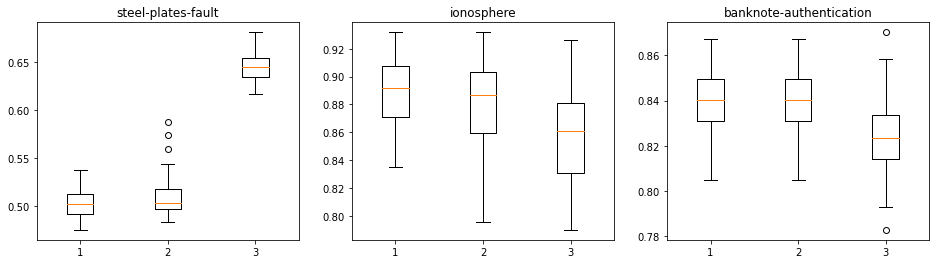

In [72]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(gnb_steelplate_accuracy_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(gnb_ionosphere_accuracy_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(gnb_banknote_accuracy_final)
plt.show()

In [74]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_steelplate_accuracy_list = []
lr_neighbor_value = [0.1,0.5,1.0,2.0,5.0]

for n in lr_neighbor_value:
    for i in range(50):
        lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        lr_y_train=lr_y_train.astype('str') # convert to string
        lr_y_test = lr_y_test.astype('str') # convert to string
        lr = LogisticRegression(C=n)
        lr.fit(lr_X_train, lr_y_train)
        y_pred = lr.predict(lr_X_test)
        lr.coef_
        lr_steelplate_accuracy = accuracy_score(lr_y_test, y_pred)
        lr_steelplate_accuracy_list.append(lr_steelplate_accuracy)

lr_steelplate_accuracy_final = pd.DataFrame( { '1': lr_steelplate_accuracy_list[0:50], 
                                            '2': lr_steelplate_accuracy_list[50:100], 
                                            '3': lr_steelplate_accuracy_list[100:150], 
                                            '4': lr_steelplate_accuracy_list[150:200], 
                                            '5': lr_steelplate_accuracy_list[200:250] } )

lr_ionosphere_accuracy_list = []
for n in lr_neighbor_value:
    for i in range(50):
        lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(io_x, io_y, test_size=0.5, random_state=i)
        lr_y_train=lr_y_train.astype('str') # convert to string
        lr_y_test = lr_y_test.astype('str') # convert to string
        lr = LogisticRegression(C=n)
        lr.fit(lr_X_train, lr_y_train)
        y_pred = lr.predict(lr_X_test)
        lr_ionosphere_accuracy = accuracy_score(lr_y_test, y_pred)
        lr_ionosphere_accuracy_list.append(lr_ionosphere_accuracy)
lr_ionosphere_accuracy_final = pd.DataFrame( { '1': lr_ionosphere_accuracy_list[0:50],
                                            '2': lr_ionosphere_accuracy_list[50:100],
                                            '3': lr_ionosphere_accuracy_list[100:150], 
                                            '4': lr_ionosphere_accuracy_list[150:200],
                                            '5': lr_ionosphere_accuracy_list[150:200]} )

lr_banknote_accuracy_list = []
for n in lr_neighbor_value:
    for i in range(50):
        lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(ba_x, ba_y, test_size=0.5, random_state=i)
        lr_y_train=lr_y_train.astype('str') # convert to string
        lr_y_test = lr_y_test.astype('str') # convert to string
        lr = LogisticRegression(C=n)
        lr.fit(lr_X_train, lr_y_train)
        y_pred = lr.predict(lr_X_test)
        lr_banknote_accuracy = accuracy_score(lr_y_test, y_pred)
        lr_banknote_accuracy_list.append(lr_banknote_accuracy)
lr_banknote_accuracy_final = pd.DataFrame( { '1': lr_banknote_accuracy_list[0:50],
                                            '2': lr_banknote_accuracy_list[50:100],
                                            '3': lr_banknote_accuracy_list[100:150],
                                            '4': lr_banknote_accuracy_list[150:200],
                                            '5': lr_banknote_accuracy_list[200:250]} )


/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

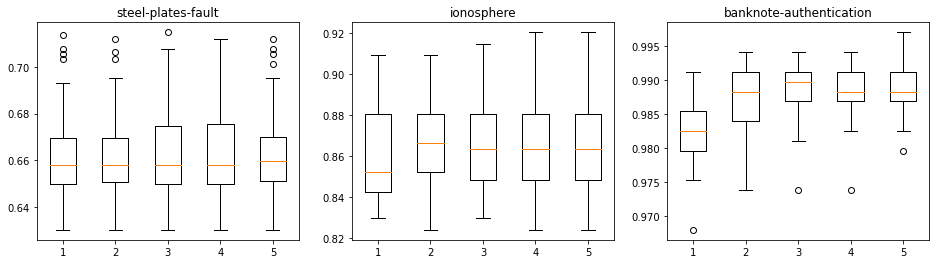

In [73]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(lr_steelplate_accuracy_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(lr_ionosphere_accuracy_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(lr_banknote_accuracy_final)
plt.show()

In [17]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

dtc_steelplate_accuracy_list = []
dtc_ionosphere_accuracy_list = []
dtc_banknote_accuracy_list = []
dtc_neighbor_value = [1,3,5,8,10]

for n in dtc_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string

        clf = DecisionTreeClassifier( max_depth=n )
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        dtc_steelplate_accuracy = accuracy_score(y_test, y_pred)
        dtc_steelplate_accuracy_list.append(dtc_steelplate_accuracy)

dtc_steelplate_accuracy_final = pd.DataFrame( { '1': dtc_steelplate_accuracy_list[0:50],
                                            '2': dtc_steelplate_accuracy_list[50:100],
                                            '3': dtc_steelplate_accuracy_list[100:150],
                                            '4': dtc_steelplate_accuracy_list[150:200],
                                            '5': dtc_steelplate_accuracy_list[200:250]} )


for n in dtc_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(io_x, io_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        clf = DecisionTreeClassifier( max_depth=n )
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        dtc_ionosphere_accuracy = accuracy_score(y_test, y_pred)
        dtc_ionosphere_accuracy_list.append(dtc_ionosphere_accuracy)

dtc_ionosphere_accuracy_final = pd.DataFrame( { '1': dtc_ionosphere_accuracy_list[0:50],
                                            '2': dtc_ionosphere_accuracy_list[50:100],
                                            '3': dtc_ionosphere_accuracy_list[100:150],
                                            '4': dtc_ionosphere_accuracy_list[150:200],
                                            '5': dtc_ionosphere_accuracy_list[200:250]} )

for n in dtc_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(ba_x, ba_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        clf = DecisionTreeClassifier( max_depth=n )
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        dtc_banknote_accuracy = accuracy_score(y_test, y_pred)
        dtc_banknote_accuracy_list.append(dtc_banknote_accuracy)

dtc_banknote_accuracy_final = pd.DataFrame( { '1': dtc_banknote_accuracy_list[0:50],
                                            '2': dtc_banknote_accuracy_list[50:100],
                                            '3': dtc_banknote_accuracy_list[100:150],
                                            '4': dtc_banknote_accuracy_list[150:200],
                                            '5': dtc_banknote_accuracy_list[200:250]} )




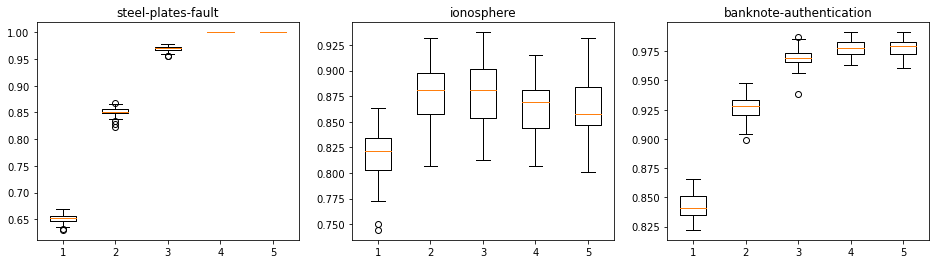

In [18]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(dtc_steelplate_accuracy_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(dtc_ionosphere_accuracy_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(dtc_banknote_accuracy_final)
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_steelplate_accuracy_list = []
gbc_ionosphere_accuracy_list = []
gbc_banknote_accuracy_list = []
gbc_neighbor_value = [1,3,5,8,10]

for n in gbc_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        gbc_clf = GradientBoostingClassifier(n_estimators=n)
        gbc_clf.fit(X_train, y_train)
        y_pred = gbc_clf.predict(X_test)
        gbc_steelplate_accuracy = accuracy_score(y_test, y_pred)
        gbc_steelplate_accuracy_list.append(gbc_steelplate_accuracy)

gbc_steelplate_accuracy_list_final = pd.DataFrame( { '1': gbc_steelplate_accuracy_list[0:50],
                                            '2': gbc_steelplate_accuracy_list[50:100],
                                            '3': gbc_steelplate_accuracy_list[100:150],
                                            '4': gbc_steelplate_accuracy_list[150:200],
                                            '5': gbc_steelplate_accuracy_list[200:250]} )  

for n in gbc_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(io_x, io_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        gbc_clf = GradientBoostingClassifier(n_estimators=n)
        gbc_clf.fit(X_train, y_train)
        y_pred = gbc_clf.predict(X_test)
        gbc_ionosphere_accuracy = accuracy_score(y_test, y_pred)
        gbc_ionosphere_accuracy_list.append(gbc_ionosphere_accuracy)

gbc_ionosphere_accuracy_list_final = pd.DataFrame( { '1': gbc_ionosphere_accuracy_list[0:50],
                                            '2': gbc_ionosphere_accuracy_list[50:100],
                                            '3': gbc_ionosphere_accuracy_list[100:150],
                                            '4': gbc_ionosphere_accuracy_list[150:200],
                                            '5': gbc_ionosphere_accuracy_list[200:250]} )

for n in gbc_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(ba_x, ba_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        gbc_clf = GradientBoostingClassifier(n_estimators=n)
        gbc_clf.fit(X_train, y_train)
        y_pred = gbc_clf.predict(X_test)
        gbc_banknote_accuracy = accuracy_score(y_test, y_pred)
        gbc_banknote_accuracy_list.append(gbc_banknote_accuracy)

gbc_banknote_accuracy_list_final = pd.DataFrame( { '1': gbc_banknote_accuracy_list[0:50],
                                            '2': gbc_banknote_accuracy_list[50:100],
                                            '3': gbc_banknote_accuracy_list[100:150],
                                            '4': gbc_banknote_accuracy_list[150:200],
                                            '5': gbc_banknote_accuracy_list[200:250]} )     

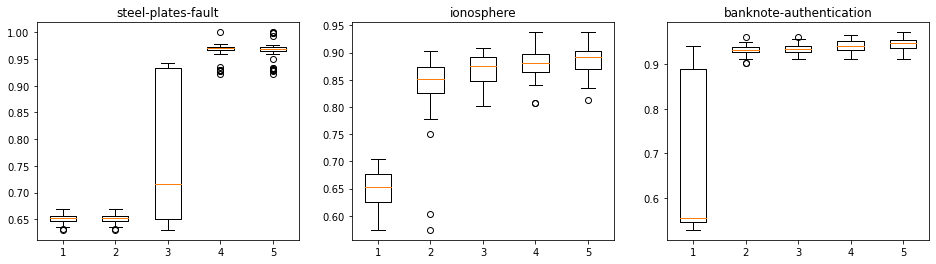

In [27]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(gbc_steelplate_accuracy_list_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(gbc_ionosphere_accuracy_list_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(gbc_banknote_accuracy_list_final)
plt.show()

In [29]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_steelplate_accuracy_list = []
rf_ionosphere_accuracy_list = []
rf_banknote_accuracy_list = []
rf_neighbor_value = [1,3,5,8,10]

for n in rf_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        rf_clf = RandomForestClassifier(n_estimators=n)
        rf_clf.fit(X_train, y_train)
        y_pred = rf_clf.predict(X_test)
        rf_steelplate_accuracy = accuracy_score(y_test, y_pred)
        rf_steelplate_accuracy_list.append(rf_steelplate_accuracy)

rf_steelplate_accuracy_list_final = pd.DataFrame( { '1': rf_steelplate_accuracy_list[0:50],
                                            '2': rf_steelplate_accuracy_list[50:100],
                                            '3': rf_steelplate_accuracy_list[100:150],
                                            '4': rf_steelplate_accuracy_list[150:200],
                                            '5': rf_steelplate_accuracy_list[200:250]} )

for n in rf_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(io_x, io_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        rf_clf = RandomForestClassifier(n_estimators=n)
        rf_clf.fit(X_train, y_train)
        y_pred = rf_clf.predict(X_test)
        rf_ionosphere_accuracy = accuracy_score(y_test, y_pred)
        rf_ionosphere_accuracy_list.append(rf_ionosphere_accuracy)

rf_ionosphere_accuracy_list_final = pd.DataFrame( { '1': rf_ionosphere_accuracy_list[0:50],
                                            '2': rf_ionosphere_accuracy_list[50:100],
                                            '3': rf_ionosphere_accuracy_list[100:150],
                                            '4': rf_ionosphere_accuracy_list[150:200],
                                            '5': rf_ionosphere_accuracy_list[200:250]} )

for n in rf_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(ba_x, ba_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        rf_clf = RandomForestClassifier(n_estimators=n)
        rf_clf.fit(X_train, y_train)
        y_pred = rf_clf.predict(X_test)
        rf_banknote_accuracy = accuracy_score(y_test, y_pred)
        rf_banknote_accuracy_list.append(rf_banknote_accuracy)

rf_banknote_accuracy_list_final = pd.DataFrame( { '1': rf_banknote_accuracy_list[0:50],
                                            '2': rf_banknote_accuracy_list[50:100],
                                            '3': rf_banknote_accuracy_list[100:150],
                                            '4': rf_banknote_accuracy_list[150:200],
                                            '5': rf_banknote_accuracy_list[200:250]} )

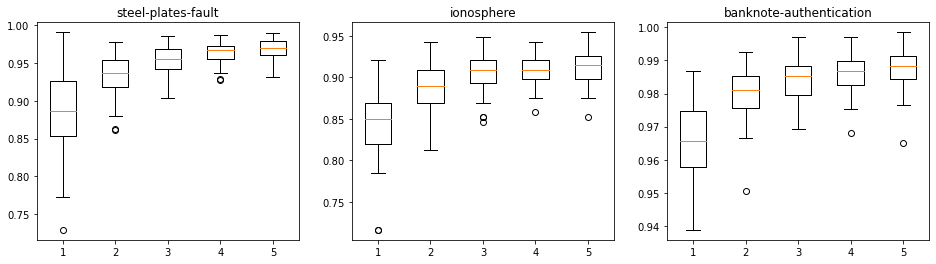

In [30]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(rf_steelplate_accuracy_list_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(rf_ionosphere_accuracy_list_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(rf_banknote_accuracy_list_final)
plt.show()


In [39]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp_steelplate_accuracy_list = []
mlp_ionosphere_accuracy_list = []
mlp_banknote_accuracy_list = []
mlp_neighbor_value = [1e-5,1e-3,0.1,10.0]

for n in mlp_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        mlp_clf = MLPClassifier(solver='lbfgs', alpha=n, random_state=i)
        mlp_clf.fit(X_train, y_train)
        y_pred = mlp_clf.predict(X_test)
        mlp_steelplate_accuracy = accuracy_score(y_test, y_pred)
        mlp_steelplate_accuracy_list.append(mlp_steelplate_accuracy)

mlp_steelplate_accuracy_list_final = pd.DataFrame( { '1': mlp_steelplate_accuracy_list[0:50],
                                            '2': mlp_steelplate_accuracy_list[50:100],
                                            '3': mlp_steelplate_accuracy_list[100:150],
                                            '4': mlp_steelplate_accuracy_list[150:200]})

for n in mlp_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(io_x, io_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        mlp_clf = MLPClassifier(solver='lbfgs', alpha=n, random_state=i)
        mlp_clf.fit(X_train, y_train)
        y_pred = mlp_clf.predict(X_test)
        mlp_ionosphere_accuracy = accuracy_score(y_test, y_pred)
        mlp_ionosphere_accuracy_list.append(mlp_ionosphere_accuracy)

mlp_ionosphere_accuracy_list_final = pd.DataFrame( { '1': mlp_ionosphere_accuracy_list[0:50],
                                            '2': mlp_ionosphere_accuracy_list[50:100],
                                            '3': mlp_ionosphere_accuracy_list[100:150],
                                            '4': mlp_ionosphere_accuracy_list[150:200]})

for n in mlp_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(ba_x, ba_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        mlp_clf = MLPClassifier(solver='lbfgs', alpha=n, random_state=i)
        mlp_clf.fit(X_train, y_train)
        y_pred = mlp_clf.predict(X_test)
        mlp_banknote_accuracy = accuracy_score(y_test, y_pred)
        mlp_banknote_accuracy_list.append(mlp_banknote_accuracy)

mlp_banknote_accuracy_list_final = pd.DataFrame( { '1': mlp_banknote_accuracy_list[0:50],
                                            '2': mlp_banknote_accuracy_list[50:100],
                                            '3': mlp_banknote_accuracy_list[100:150],
                                            '4': mlp_banknote_accuracy_list[150:200]})



/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs fail

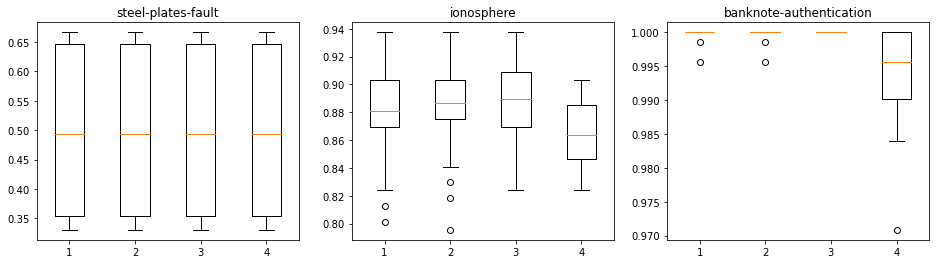

In [42]:

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(mlp_steelplate_accuracy_list_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(mlp_ionosphere_accuracy_list_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(mlp_banknote_accuracy_list_final)
plt.show()